# WeatherPy
----

### Analysis
-Temperature has an obvious correlation with latitude. This makes sense as it's typically colder towards the poles and warmer near the equator. This chart shows it warmer in the southern hemishpere, which makes sense, because it's summer there, and winter in the northern hemisphere.

-Relative humidity varies throughout the latitudes, but it is noteable that the humidity is generally higher near the equator.

-There aren't really any noticeable trends in cloudiness or wind speeds when compared to latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set up lists to hold response data for name and rating
final_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Setup beginning of print log
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Set counters for loop
i = 1
j = 1

# Iterate through cities list to pull weather data
for city in cities:
    # Parse data into sets, take timed break after each set, reset counters
    if i == 51:
        time.sleep(15)
        i = 1
        j = j + 1
    else:
        # Update print log
        print(f"Processing Record {i} of Set {j} | {city}")
        # Set up json, pull each type of data, add city to list
        try:
            query_url = url + "units=Imperial&appid=" + api_key + "&q=" + city
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            cloudiness.append(weather_json['clouds']['all'])
            country.append(weather_json['sys']['country'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            lat.append(weather_json['coord']['lat'])
            lng.append(weather_json['coord']['lon'])
            max_temp.append(weather_json['main']['temp_max'])
            wind_speed.append(weather_json['wind']['speed'])
            final_cities.append(city)
        # If there is an error retrieving data, set exception and add to print log
        except KeyError:
            print(f"City not found. Skipping...")
        # Reset counter
        i = i + 1
    
# Create dataframe
weather = pd.DataFrame({
    "City": final_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | husavik
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | hervey bay
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | campbell river
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | anito
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | tumannyy
City not fou

Processing Record 29 of Set 4 | vao
Processing Record 30 of Set 4 | yellowknife
Processing Record 31 of Set 4 | yerbogachen
Processing Record 32 of Set 4 | kumta
Processing Record 33 of Set 4 | ixtapa
Processing Record 34 of Set 4 | artyom
Processing Record 35 of Set 4 | christchurch
Processing Record 36 of Set 4 | bluff
Processing Record 37 of Set 4 | karratha
Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | kuala terengganu
Processing Record 41 of Set 4 | chagda
City not found. Skipping...
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | paamiut
Processing Record 44 of Set 4 | playas
Processing Record 45 of Set 4 | pitimbu
Processing Record 46 of Set 4 | safford
Processing Record 47 of Set 4 | stoyba
City not found. Skipping...
Processing Record 48 of Set 4 | ratnapura
Processing Record 49 of Set 4 | roald
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | koraput
Processing Recor

Processing Record 16 of Set 8 | thai binh
Processing Record 17 of Set 8 | silvi
Processing Record 18 of Set 8 | cravo norte
Processing Record 19 of Set 8 | lumphat
Processing Record 20 of Set 8 | tari
Processing Record 21 of Set 8 | kulhudhuffushi
Processing Record 22 of Set 8 | flinders
Processing Record 23 of Set 8 | tubuala
Processing Record 24 of Set 8 | murgab
Processing Record 25 of Set 8 | meulaboh
Processing Record 26 of Set 8 | makakilo city
Processing Record 27 of Set 8 | sembe
City not found. Skipping...
Processing Record 28 of Set 8 | bayir
Processing Record 29 of Set 8 | warqla
City not found. Skipping...
Processing Record 30 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 31 of Set 8 | chapais
Processing Record 32 of Set 8 | bolshoy tsaryn
City not found. Skipping...
Processing Record 33 of Set 8 | half moon bay
Processing Record 34 of Set 8 | anadyr
Processing Record 35 of Set 8 | hutchinson
Processing Record 36 of Set 8 | alappuzha
City not found. Skip

Processing Record 1 of Set 12 | vigrestad
Processing Record 2 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 3 of Set 12 | lolua
City not found. Skipping...
Processing Record 4 of Set 12 | yablonovo
Processing Record 5 of Set 12 | lufilufi
Processing Record 6 of Set 12 | hihifo
City not found. Skipping...
Processing Record 7 of Set 12 | beringovskiy
Processing Record 8 of Set 12 | dwarka
Processing Record 9 of Set 12 | poum
Processing Record 10 of Set 12 | chokwe
City not found. Skipping...
Processing Record 11 of Set 12 | gopichettipalaiyam
City not found. Skipping...
Processing Record 12 of Set 12 | zhigansk
Processing Record 13 of Set 12 | sillod
Processing Record 14 of Set 12 | sibiti
Processing Record 15 of Set 12 | beloha
Processing Record 16 of Set 12 | zalantun
Processing Record 17 of Set 12 | udachnyy
Processing Record 18 of Set 12 | cotonou
Processing Record 19 of Set 12 | kirovskiy
Processing Record 20 of Set 12 | nenjiang
Processing Record 21 of Set 12 |

In [4]:
# Display dataframe
weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,1546568115,100,-23.12,-134.97,76.06,22.08
1,husavik,44,CA,1546568116,87,50.56,-96.99,26.60,8.43
2,kapaa,75,US,1546563360,62,22.08,-159.32,82.04,21.92
3,port alfred,12,ZA,1546568117,89,-33.59,26.89,68.41,13.02
4,hervey bay,24,AU,1546567200,42,-25.30,152.85,86.00,17.22
5,norman wells,75,CA,1546563600,85,65.28,-126.83,15.80,6.93
6,kaitangata,92,NZ,1546568119,83,-46.28,169.85,56.21,16.82
7,alofi,92,NU,1546568120,100,-19.06,-169.92,76.69,15.48
8,vaini,0,IN,1546563600,62,15.34,74.49,53.60,5.97
9,tuatapere,32,NZ,1546568121,84,-46.13,167.69,60.53,16.26


In [5]:
# Save dataframe to csv
weather.to_csv('weather.csv')

#### Latitude vs. Temperature Plot

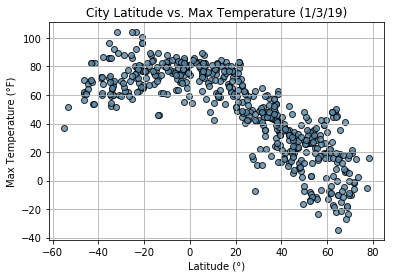

In [6]:
# Build the scatter plots
plt.scatter(weather['Lat'], weather['Max Temp'], color = '#5A89A8', alpha=0.8, edgecolor='black', linewidth=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (1/3/19)')
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temperature (°F)')
plt.grid()

# Save Figure
plt.savefig("Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

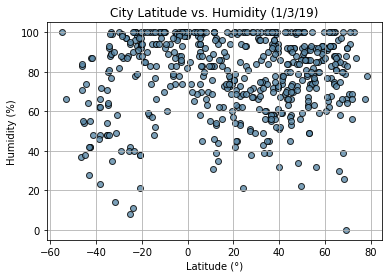

In [7]:
# Build the scatter plots
plt.scatter(weather['Lat'], weather['Humidity'], color = '#5A89A8', alpha=0.8, edgecolor='black', linewidth=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (1/3/19)')
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')
plt.grid()

# Save Figure
plt.savefig("Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

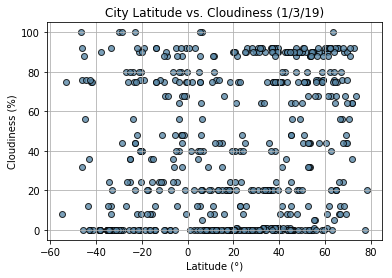

In [8]:
# Build the scatter plots
plt.scatter(weather['Lat'], weather['Cloudiness'], color = '#5A89A8', alpha=0.8, edgecolor='black', linewidth=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (1/3/19)')
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save Figure
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

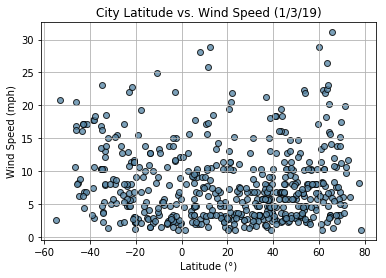

In [9]:
# Build the scatter plots
plt.scatter(weather['Lat'], weather['Wind Speed'], color = '#5A89A8', alpha=0.8, edgecolor='black', linewidth=1.0)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (1/3/19)')
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save Figure
plt.savefig("Wind.png")

# Show plot
plt.show()